In [31]:
import pandas as pd
bitcoin = pd.read_excel('GDAX.BTC-USD_790301_230316.xlsx')
smp500 = pd.read_csv('^spx_d (1).csv')

In [32]:
bitcoin = bitcoin.iloc[:,[2,7]]
bitcoin.columns = ['Date', 'Close']
bitcoin['Date'] = bitcoin['Date'].map(lambda x:str(x)[0:4]+'-'+str(x)[4:6]+'-'+str(x)[6:8]) 
smp500 = smp500[['Date','Close']]

table = smp500.set_index('Date').join(bitcoin.set_index('Date'), lsuffix='-')
table = table.dropna()
table.columns = ['smp500', 'bitcoin']
table

,smp500,bitcoin
Date,,
2014-12-01,2053.44,370.00
2014-12-02,2066.55,378.00
2014-12-03,2074.33,378.00
2014-12-04,2071.92,377.10
2014-12-08,2060.31,375.00
...,...,...
2023-03-09,3918.32,20367.01
2023-03-10,3861.59,20230.08
2023-03-13,3855.76,24220.00


<AxesSubplot: xlabel='Date'>

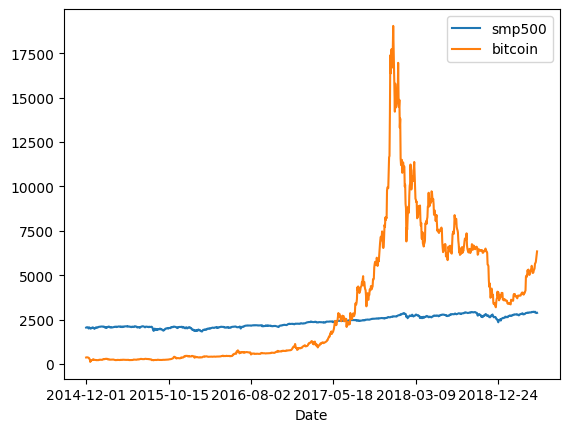

In [33]:
table.iloc[0:365*3].plot()

In [34]:
table.index =pd.to_datetime(table.index)
table['Year']=table.index.year
table['Mon']=table.index.month
table['Day']=table.index.day
dates=table[['Year','Mon','Day']]

table.index=pd.MultiIndex.from_tuples(dates.values.tolist(), names=dates.columns)
table.iloc[:, :2]

smp500   bitcoin
Year Mon Day                   
2014 12  1    2053.44    370.00
         2    2066.55    378.00
         3    2074.33    378.00
         4    2071.92    377.10
         8    2060.31    375.00
...               ...       ...
2023 3   9    3918.32  20367.01
         10   3861.59  20230.08
         13   3855.76  24220.00
         14   3919.29  24762.65
         15   3891.93  24377.16

[2063 rows x 2 columns]

In [35]:
table['difference'] = table['bitcoin']-table['smp500']
table

smp500   bitcoin  Year  Mon  Day  difference
Year Mon Day                                               
2014 12  1    2053.44    370.00  2014   12    1    -1683.44
         2    2066.55    378.00  2014   12    2    -1688.55
         3    2074.33    378.00  2014   12    3    -1696.33
         4    2071.92    377.10  2014   12    4    -1694.82
         8    2060.31    375.00  2014   12    8    -1685.31
...               ...       ...   ...  ...  ...         ...
2023 3   9    3918.32  20367.01  2023    3    9    16448.69
         10   3861.59  20230.08  2023    3   10    16368.49
         13   3855.76  24220.00  2023    3   13    20364.24
         14   3919.29  24762.65  2023    3   14    20843.36
         15   3891.93  24377.16  2023    3   15    20485.23

[2063 rows x 6 columns]

In [36]:
year_day_mean=table.groupby(level=[0,1]).mean()
tmpmn=year_day_mean['difference']
mon_mean=tmpmn.unstack()
mon_mean.columns=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
tmpmn.head()

Year  Mon
2014  12    -1685.956250
2015  1     -1797.670714
      2     -1848.901579
      3     -1809.052727
      4     -1859.431905
Name: difference, dtype: float64

In [37]:
corr=mon_mean.corr()
corr

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Jan,1.000000,0.980927,0.959606,0.945339,0.932360,0.916217,0.888441,0.832148,0.805841,0.758396,0.703388,0.646412
Feb,0.980927,1.000000,0.993828,0.989525,0.981861,0.968063,0.946551,0.916081,0.898051,0.864797,0.821757,0.765471
Mar,0.959606,0.993828,1.000000,0.998763,0.992183,0.977352,0.959590,0.941221,0.928606,0.903062,0.861397,0.795882
Apr,0.945339,0.989525,0.998763,1.000000,0.995749,0.983353,0.968320,0.955127,0.944275,0.921063,0.882169,0.816158
May,0.932360,0.981861,0.992183,0.995749,1.000000,0.994450,0.985851,0.974518,0.964359,0.940585,0.906984,0.843689
Jun,0.916217,0.968063,0.977352,0.983353,0.994450,1.000000,0.996798,0.981934,0.969729,0.940218,0.910050,0.852723
Jul,0.888441,0.946551,0.959590,0.968320,0.985851,0.996798,1.000000,0.988147,0.977713,0.948914,0.921577,0.860136
Aug,0.832148,0.916081,0.941221,0.955127,0.974518,0.981934,0.988147,1.000000,0.998125,0.985495,0.969466,0.914875
Sep,0.805841,0.898051,0.928606,0.944275,0.964359,0.969729,0.977713,0.998125,1.000000,0.993724,0.980441,0.924270
Oct,0.758396,0.864797,0.903062,0.921063,0.940585,0.940218,0.948914,0.985495,0.993724,1.000000,0.993381,0.940065


([<matplotlib.axis.YTick at 0x1f07e2c1c90>,
 [Text(0, 0, 'Jan'),
  Text(0, 1, 'Feb'),
  Text(0, 2, 'Mar'),
  Text(0, 3, 'Apr'),
  Text(0, 4, 'May'),
  Text(0, 5, 'Jun'),
  Text(0, 6, 'Jul'),
  Text(0, 7, 'Aug'),
  Text(0, 8, 'Sep'),
  Text(0, 9, 'Oct'),
  Text(0, 10, 'Nov'),
  Text(0, 11, 'Dec')])

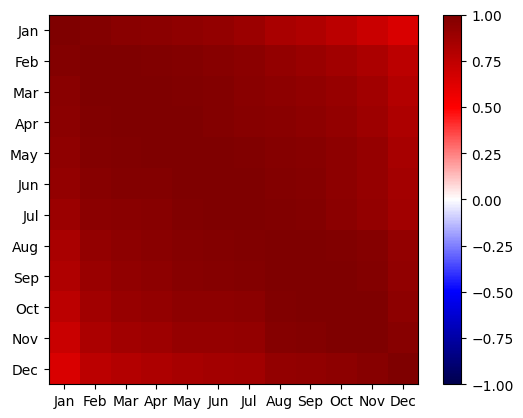

In [38]:
import matplotlib.pyplot as plt
plt.imshow(corr,cmap='seismic',interpolation='none',vmin=-1,vmax=1)
plt.colorbar()
plt.xticks(range(len(corr)),corr.columns)
plt.yticks(range(len(corr)),corr.columns)